Exercise

In [0]:
url = 'https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'

In [5]:
!pip install requests_html
from requests_html import HTMLSession

    100% |████████████████████████████████| 1.2MB 18.4MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/11/ef/7a/b4e5692572b93ce67bb9d0680bc8e840ff9a21fab73a3bff56
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Stored in directory: /root/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
Successfully built parse fake-useragent pyppeteer


In [0]:
r=HTMLSession().get(url)

In [7]:
print(r.html.raw_html)

b'<!doctype html>\n<!--[if lt IE 7]> <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie10 lt-ie9" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n\n<!--[if gt IE 9]><!--> <html class="no-js" lang="en-US" dir="ltr" prefix="fb: http://www.facebook.com/2008/fbml og: http://ogp.me/ns#"> <!--<![endif]-->\n\n\t<head>\n\t\t\n\t\t\t\n\t\t\n\t\t\n\t\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n\t\t

In [0]:
element=r.html.find('#entryContent > ul:nth-child(7)')

In [0]:
#print(element[0].text)

In [0]:
import re
import pandas as pd

regex=",\s*([\w+\s*]+).*\$(\d+),(\d+)"
regexWage = r"\$\d+,\d+"
regexCollege = r"\,\D+[\,\(:]"

test_str = (element[0].text)

#matches = re.finditer(regex, test_str, re.MULTILINE)
p = re.compile(regexWage)
s = test_str
mylist=p.findall(s)
j=0
for i in mylist:
    mylist[j]=i.strip("$")
    j+=1
k=0
for i in mylist:
    mylist[k]=i.replace(',','')
    k+=1
for item in mylist:
    float(item)/2000
#print(*[float(i)/2000 for i in mylist])
a = re.compile(regexCollege)
b = test_str
mylistCollege=a.findall(b)
z=0
for i in mylistCollege:
    mylistCollege[z]=i.replace(', ','')
    z+=1
y=0
for i in mylistCollege:
    mylistCollege[y]=i.replace(':','')
    y+=1
x=0
for i in mylistCollege:
    mylistCollege[x]=i.replace(' (','')
    x+=1
w=0
for i in mylistCollege:
    mylistCollege[w]=i.replace('(','')
    w+=1
v=0
for i in mylistCollege:
    mylistCollege[v]=i.replace(',','')
    v+=1
#print(mylistCollege)

In [0]:
result=re.findall(regex,element[0].text)
mydict=dict()
for item in result:
  mydict[item[0].strip()]=float(item[1]+item[2])/2000

In [71]:
mylist=list(mydict.items());mylist
mylist.sort(key=lambda x:x[1],reverse=False)
for a, b in mylist:
    print(f'{a}: ${b}')

University of Mount Union: $110.8805
Marietta College: $144.1475
Hiram College: $146.668
Heidelberg University: $150.0025
Baldwin Wallace University: $182.808
Ohio Wesleyan University: $183.3125
Otterbein University: $189.0175
Muskingum University: $192.1165
Capital University: $194.285
Ohio Northern University: $207.358
Denison University: $217.661
Kenyon College: $225.849
Wittenberg University: $231.752
Antioch College: $253.836
Oberlin College: $414.9565
College of Wooster: $455.8255


([<matplotlib.axis.YTick at 0x7f8ad18362b0>,
 <a list of 16 Text yticklabel objects>)

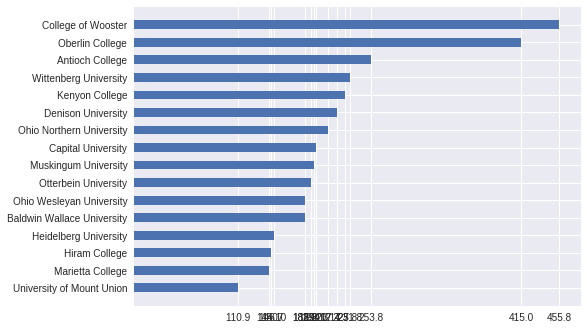

In [73]:
import numpy as np                                                               
import matplotlib.pyplot as plt

labels, ys = zip(*mylist)
xs = np.arange(len(labels))
width = .5

plt.barh(xs, ys, width, align='center')

plt.xticks(ys) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(xs,labels)

In [24]:
for k,v in mydict.items():
  print(f'{k}: ${v}')

College of Wooster: $455.8255
Oberlin College: $414.9565
Antioch College: $253.836
Wittenberg University: $231.752
University of Mount Union: $110.8805
Kenyon College: $225.849
Denison University: $217.661
Ohio Northern University: $207.358
Capital University: $194.285
Muskingum University: $192.1165
Otterbein University: $189.0175
Ohio Wesleyan University: $183.3125
Baldwin Wallace University: $182.808
Heidelberg University: $150.0025
Hiram College: $146.668
Marietta College: $144.1475


In [0]:
myzip=list(zip(mylistCollege, mylist))
for a, b in myzip:
    print(a,':', float(b)/2000)

College of Wooster : 455.8255
Oberlin College : 414.9565
Antioch College : 253.836
Wittenberg University : 231.752
University of Mount Union : 226.9
Kenyon College : 225.849
Denison University : 217.661
Ohio Northern University : 207.358
Capital University : 194.285
Muskingum University : 192.1165
Otterbein University : 189.0175
Ohio Wesleyan University : 183.3125
Baldwin Wallace University : 182.808
Heidelberg University : 150.0025
Hiram College : 146.668
Marietta College : 144.1475
University of Mount Union : 110.8805


Book Chapters

In [0]:
import sys
count=0
for line in sys.stdin:
    count+=1
print(count)

0


In [0]:
# most_common_words.py
import sys
from collections import Counter
# pass in number of words as first argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1) # non-zero exit code indicates error

counter = Counter(word.lower() # lowercase words
    for line in sys.stdin #
    for word in line.strip().split() # split on spaces
    if word) # skip empty 'words'
for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

usage: most_common_words.py num_words


SystemExit: 1

C:\Users\rjf0029\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
file_for_reading=open('tab_delimited_stock_prices.txt','r')
file_for_writing = open('myfile.txt', 'w')
file_for_appending = open('myfile.txt', 'a')
file_for_writing.close()
with open('myfile.txt','r') as f:
    data = list(f)
 #   write(data)

In [0]:
starts_with_hash = 0

with open('myfile.txt','r') as f:
    for line in f: # look at each line in the file
        if re.match("^#",line): # use a regex to see if it starts with '#'
            starts_with_hash += 1 # if it does, add 1 to the count

In [0]:
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

Error: iterator should return strings, not bytes (did you open the file in text mode?)

In [0]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices.txt','wb') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

TypeError: a bytes-like object is required, not 'str'

In [0]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.google.com").text
soup = BeautifulSoup(html, 'html5lib')
first_paragraph = soup.find('p') # or just soup.p
first_paragraph
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

In [0]:
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page=1"

In [0]:
soup = BeautifulSoup(requests.get(url).text, 'html5lib')
tds = soup('td', 'thumbtext')
tds
# 30

[]

In [0]:
def is_video(td):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    pricelabels = td('span', 'pricelabel')
    return (len(pricelabels) == 1 and
        pricelabels[0].text.strip().startswith("Video"))
print(len([td for td in tds if not is_video(td)]))
# 21 for me, might be different for you

0


In [0]:
title = td.find("div", "thumbheader").a.text

NameError: name 'td' is not defined

In [0]:
from bs4 import BeautifulSoup
import requests

In [0]:
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
            "data.do?sortby=publicationDate&page="

In [0]:
books = []
NUM_PAGES = 31

In [0]:
for page_num in range(1, NUM_PAGES + 1):
    print("souping page", page_num, ",", len(books), " found so far")
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for td in soup('td', 'thumbtext'):
        if not is_video(td):
            books.append(book_info(td))
# now be a good citizen and respect the robots.txt!
sleep(30)

souping page 1 , 0  found so far
souping page 2 , 0  found so far
souping page 3 , 0  found so far
souping page 4 , 0  found so far
souping page 5 , 0  found so far
souping page 6 , 0  found so far
souping page 7 , 0  found so far
souping page 8 , 0  found so far
souping page 9 , 0  found so far
souping page 10 , 0  found so far
souping page 11 , 0  found so far
souping page 12 , 0  found so far
souping page 13 , 0  found so far
souping page 14 , 0  found so far
souping page 15 , 0  found so far
souping page 16 , 0  found so far
souping page 17 , 0  found so far
souping page 18 , 0  found so far
souping page 19 , 0  found so far
souping page 20 , 0  found so far
souping page 21 , 0  found so far
souping page 22 , 0  found so far
souping page 23 , 0  found so far
souping page 24 , 0  found so far
souping page 25 , 0  found so far
souping page 26 , 0  found so far
souping page 27 , 0  found so far
souping page 28 , 0  found so far
souping page 29 , 0  found so far
souping page 30 , 0  fo

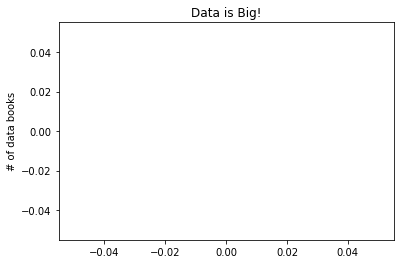

In [0]:
def get_year(book):
    """book["date"] looks like 'November 2014' so we need to
    split on the space and then take the second piece"""
    return int(book["date"].split()[1])

# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                    if get_year(book) <= 2014)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [0]:
import json
serialized = """{ "title" : "Data Science Book",
                "author" : "Joel Grus",
                "publicationYear" : 2014,
                "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

{'title': 'Data Science Book', 'author': 'Joel Grus', 'publicationYear': 2014, 'topics': ['data', 'science', 'data science']}


In [0]:
import requests, json
endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)

In [0]:
!pip install python-dateutil

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
from dateutil.parser import parse

dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [0]:
last_5_repositories = sorted(repos,
                            key=lambda r: r["created_at"],
                            reverse=True)[:5]
last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

In [0]:
#!pip install twython
from twython import Twython

twitter = Twython('Lrrgj6b6dLnKEHWNg983JdSW1', '5HqWa8BxaCX38YJwoZZ3epY6Ee3chiGbHiE6vRfqaeNmnuv3UR')

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"].encode('utf-8')
    text = status["text"].encode('utf-8')
    print(user, ":", text)
print()

b'RRISDTech' : b'RT @RRISDCS: What factors make some people live longer than others? Learn to answer big questions! Bootstrap: Data Science | STEM Center |\xe2\x80\xa6'
b'e_strategy' : b'How It Feels to Learn Data Science in 2019 https://t.co/82TGVSfXOB'
b'Python_USA' : b'Data Science Intern, Motorola Mobility: SunIRef:it Data Science Intern, Motorola Mobility \xe2\x80\x93 Santa Clara, CA 95054 \xe2\x80\x93\xe2\x80\xa6 https://t.co/ySrv7CTSLr'
b'Richard_Weber' : b'RT @CrBravoR: Happy to have met all the other @turinginst fellows @unisouthampton! Great group of people working in many different data sci\xe2\x80\xa6'
b'souzatharsis' : b'\xe2\x80\x9cData Science\xe2\x80\x8a\xe2\x80\x94\xe2\x80\x8aWhat is Alt Data or Alternative Data?\xe2\x80\x9d https://t.co/50HJN0TXNU'
b'pwang' : b'@WillingCarol @dstufft @brettsky @vorpalsmith @zooba @uranusjr @acanthamoeba @ncoghlan_dev @kushaldas Glad to hear\xe2\x80\xa6 https://t.co/bzB7Kbkxdj'
b'notorioushilary' : b'RT @analyticbridge: Is data science

In [0]:
from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python dict representing a tweet"""

        # only want to collect English-language tweets
        if data['lang'] == 'en':
            tweets.append(data)
            print("received tweet #", len(tweets))

        # stop when we've collected enough
        if len(tweets) >= 1000:
            self.disconnect()

def on_error(self, status_code, data):
    print(status_code, data)
    self.disconnect()

In [0]:
stream = MyStreamer('Lrrgj6b6dLnKEHWNg983JdSW1', '5HqWa8BxaCX38YJwoZZ3epY6Ee3chiGbHiE6vRfqaeNmnuv3UR',
                    '63123768-q36bLqyM4UMv8jd27j2FNLHqTv7EryrF5uOOHFWnO', 'r3hxqlPAcwgQ01oYU61Y2cgwLVHP6s9eoqIltZGOgZlLz')
# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

received tweet # 1
received tweet # 2
received tweet # 3
received tweet # 4
received tweet # 5
received tweet # 6
received tweet # 7
received tweet # 8
received tweet # 9
received tweet # 10
received tweet # 11
received tweet # 12
received tweet # 13
received tweet # 14
received tweet # 15
received tweet # 16
received tweet # 17
received tweet # 18
received tweet # 19
received tweet # 20
received tweet # 21
received tweet # 22
received tweet # 23
received tweet # 24
received tweet # 25
received tweet # 26
received tweet # 27
received tweet # 28
received tweet # 29
received tweet # 30
received tweet # 31
received tweet # 32
received tweet # 33
received tweet # 34
received tweet # 35
received tweet # 36
received tweet # 37
received tweet # 38
received tweet # 39
received tweet # 40
received tweet # 41
received tweet # 42
received tweet # 43
received tweet # 44
received tweet # 45
received tweet # 46
received tweet # 47
received tweet # 48
received tweet # 49
received tweet # 50
received 

KeyboardInterrupt: 

In [0]:
top_hashtags = Counter(hashtag['text'].lower()
                        for tweet in tweets
                        for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('ai', 2), ('epitwitter', 1), ('kareemhunt', 1), ('fantasyfootball', 1), ('detroitdemolition', 1)]


In [0]:
users = [[0, "Hero", 0],
[1, "Dunn", 2],
[2, "Sue", 3],
[3, "Chi", 3]]

In [0]:
class Table:
    def __init__(self, columns):
        self.columns = columns
        self.rows = []
    
    def __repr__(self):
        """pretty representation of the table: columns then rows"""
        return str(self.columns) + "\n" + "\n".join(map(str, self.rows))

    def insert(self, row_values):
        if len(row_values) != len(self.columns):
            raise TypeError("wrong number of elements")
        row_dict = dict(zip(self.columns, row_values))
        self.rows.append(row_dict)
    
    def update(self, updates, predicate):
        for row in self.rows:
            if predicate(row):
                for column, new_value in updates.iteritems():
                    row[column] = new_value
    
    def delete(self, predicate=lambda row: True):
        """delete all rows matching predicate
        or all rows if no predicate supplied"""
        self.rows = [row for row in self.rows if not(predicate(row))]
    
    def select(self, keep_columns=None, additional_columns=None):
    
        if keep_columns is None: # if no columns specified,
            keep_columns = self.columns # return all columns

        if additional_columns is None:
            additional_columns = {}
        # new table for results
        result_table = Table(keep_columns + additional_columns.keys())

        for row in self.rows:
            new_row = [row[column] for column in keep_columns]
            for column_name, calculation in additional_columns.iteritems():
                new_row.append(calculation(row))
            result_table.insert(new_row)
        return result_table
    
    def where(self, predicate=lambda row: True):
        """return only the rows that satisfy the supplied predicate"""
        where_table = Table(self.columns)
        where_table.rows = filter(predicate, self.rows)
        return where_table

    def limit(self, num_rows):
        """return only the first num_rows rows"""
        limit_table = Table(self.columns)
        limit_table.rows = self.rows[:num_rows]
        return limit_table

In [0]:
users = Table(["user_id", "name", "num_friends"])
users.insert([0, "Hero", 0])
users.insert([1, "Dunn", 2])
users.insert([2, "Sue", 3])
users.insert([3, "Chi", 3])
users.insert([4, "Thor", 3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate", 2])
users.insert([9, "Klein", 3])
users.insert([10, "Jen", 1])
print(users)

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}


In [0]:
users.update({'num_friends' : 3}, # set num_friends = 3
                lambda row: row['user_id'] == 1) # in rows where user_id == 1

AttributeError: 'dict' object has no attribute 'iteritems'

In [0]:
def delete(self, predicate=lambda row: True):
    """delete all rows matching predicate
    or all rows if no predicate supplied"""
    self.rows = [row for row in self.rows if not(predicate(row))]

In [0]:
users.delete(lambda row: row["user_id"] == 1) # deletes rows with user_id == 1
users.delete() # deletes every row

In [0]:
# SELECT * FROM users;
users.select()

# SELECT * FROM users LIMIT 2;
users.limit(2)

# SELECT user_id FROM users;
users.select(keep_columns=["user_id"])

# SELECT user_id FROM users WHERE name = 'Dunn';
users.where(lambda row: row["name"] == "Dunn") \
    .select(keep_columns=["user_id"])

# SELECT LENGTH(name) AS name_length FROM users;
def name_length(row): return len(row["name"])

users.select(keep_columns=[],
            additional_columns = { "name_length" : name_length })

TypeError: can only concatenate list (not "dict_keys") to list

In [0]:
user_interests = Table(["user_id", "interest"])
user_interests.insert([0, "SQL"])
user_interests.insert([0, "NoSQL"])
user_interests.insert([2, "SQL"])
user_interests.insert([2, "MySQL"])